In [127]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline 

In [128]:
df = pd.read_csv("customer.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6781,4919-MOAVT,Male,0,No,Yes,3,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.65,220.1,Yes
6673,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,43.95,85.1,No
3081,6376-GAHQE,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,77.85,299.2,Yes
4139,7278-CKDNC,Male,1,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45,No
3573,6506-EYCNH,Female,0,Yes,Yes,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.55,543.8,No


In [129]:
df.drop('customerID' ,axis = 'columns' ,inplace=True)

In [130]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [131]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [132]:
#transform the data object to numeric and send to coerce it will ignore space 
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [133]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [134]:
df.shape

(7043, 20)

In [135]:
df1 =df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [136]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [137]:
df1 = df1.copy()  # Create a deep copy of the DataFrame
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')


In [138]:
df['TotalCharges'].dtypes


dtype('O')

In [139]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

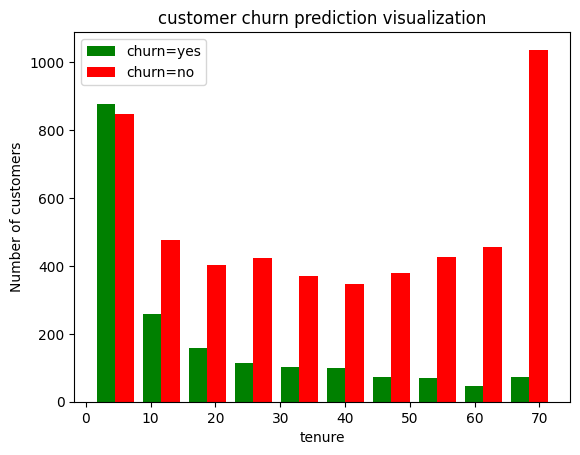

In [140]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title("customer churn prediction visualization")

plt.hist([tenure_churn_yes ,tenure_churn_no],color=['green','red'],label=['churn=yes','churn=no'])
plt.legend()       

(array([[ 148.,   57.,  119.,  152.,   53.,  350.,  355.,  319.,  273.,
           43.],
        [1452.,  134.,  246.,  485.,  419.,  544.,  597.,  550.,  485.,
          251.]]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 2 BarContainer objects>)

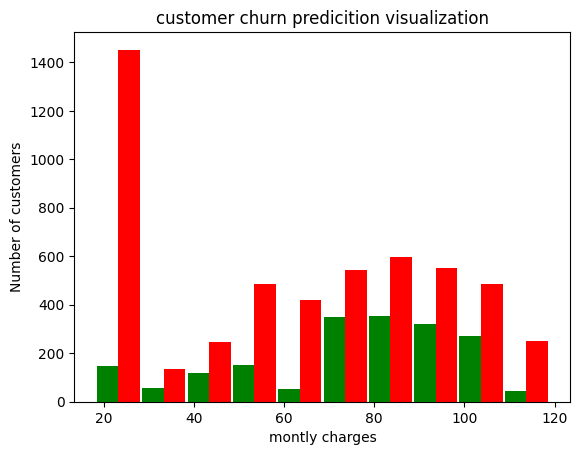

In [141]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("montly charges")
plt.ylabel("Number of customers")
plt.title("customer churn predicition visualization")

blodd_suger_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blodd_suger_women = [67,98,89,120,133,150,84,96,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no] , rwidth=0.95, color=['green','red'],label=['churn=yes','churn_no'])

In [142]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes =="object":
           print(f'{col} :{df[col].unique()}')

In [143]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [144]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [145]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [153]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col] = df1[col].replace({'Yes': 1, 'No': 0}).astype(int)


In [154]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [155]:
df1 = df1.copy()  # Create a copy of the DataFrame to avoid chained assignment issues
df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0}).astype(int)


In [156]:
df2 = pd.get_dummies(data = df1,columns = ['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [157]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2267,1,0,1,0,72,1,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
1788,1,0,1,0,57,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
1226,1,0,1,0,72,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False
5491,0,0,0,0,21,1,0,1,0,1,...,True,False,False,True,False,False,True,False,False,False
6230,1,0,1,1,1,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [162]:
# Iterate over the columns in df2
for col in df2.columns:
    # Check if the column contains boolean values
    if df2[col].dtype == 'bool':
        # Convert boolean values to integers (1 and 0) without triggering warnings
        df2[col] = df2[col].astype(int)


In [163]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
5791,0,0,1,0,63,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
2897,0,0,0,0,43,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2991,1,1,1,0,37,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5528,0,0,1,0,44,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5502,0,1,1,0,16,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [164]:
df2.dtypes

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
DSL                            int64
Fiber optic                    int64
No                             int64
Month-to-month                 int64
One year                       int64
Two year                       int64
Bank transfer (automatic)      int64
Credit card (automatic)        int64
Electronic check               int64
Mailed check                   int64
d

In [167]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [170]:
df2.sample(5)
print(f'{col}:{df2[col].unique()}')

Mailed check:[0 1]


In [171]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [175]:
X = df2.drop('Churn',axis ='columns')
y = df2['Churn']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [179]:
X_train.shape

(5625, 26)

In [180]:
X_test.shape

(1407, 26)

In [181]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [182]:
len(X_train.columns)

26

In [191]:
import tensorflow as tf
from tensorflow import keras

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(26,)),            # Use Input layer to specify the input shape
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5913 - loss: 0.6624
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7864 - loss: 0.4653
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7946 - loss: 0.4308
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8063 - loss: 0.4169
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4196
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8014 - loss: 0.4185
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.4070
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8048 - loss: 0.4144
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8045 - loss: 0.4127
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8009 - loss: 0.4245
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - loss: 0.4202
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [192]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.4370


[0.4475168287754059, 0.7810945510864258]

In [193]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.28289986],
       [0.46357843],
       [0.01439846],
       [0.7178168 ],
       [0.531375  ]], dtype=float32)

In [194]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [195]:
y_pred =[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [197]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [198]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

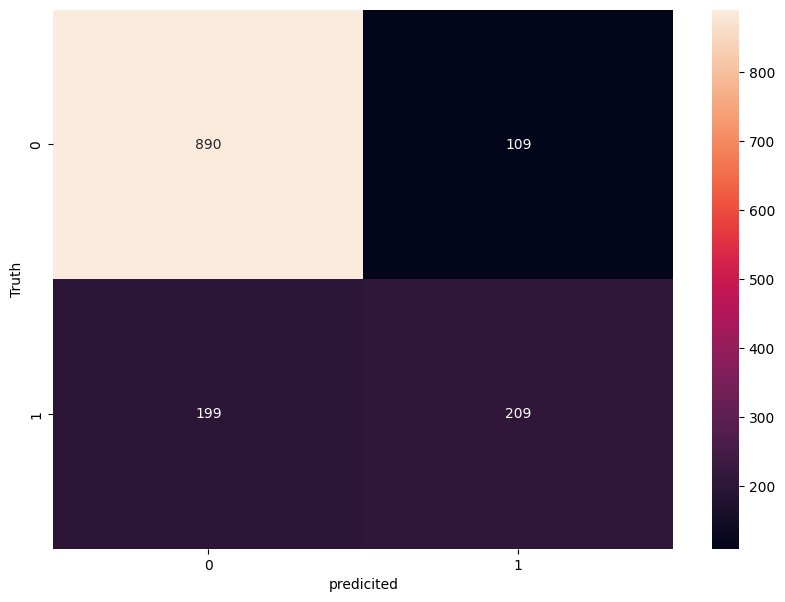

In [202]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicited')
plt.ylabel('Truth')

##ACCURACY

In [204]:
round((890+209)/(890+209+199+109),2)

0.78

##PREDICTION FOR 0 CLASS,I.E.PRECISION FOR CUSTOMER WHO DID NOT CHURN

In [210]:
round(890/(890+199),2)

0.82

##PREDICTION FOR 1 CLASS,I.E.PRECISION FOR CUSTOMER WHO ACTUALLY CHURNED 

In [211]:
round(209/(209+137),2)

0.6

RECALL FOR 0 CLASS

In [212]:
round(209/(209+199),2)

0.51